### In this assignment students have to compress racoon grey scale image into 5 clusters. In the end, visualize both raw and compressed image and look for quality difference.

### The raw image is available in spicy.misc package with the name face.
Hint:

import numpy as np

from sklearn import cluster, datasets

from scipy import misc

In [102]:
import scipy.misc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [103]:
f = scipy.misc.face(gray=True)

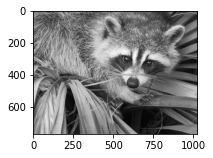

In [104]:
# Diaplaying the Imaage
plt.figure(figsize=(10, 3.6))
plt.subplot(131)
plt.imshow(f, cmap=plt.cm.gray)


In [115]:
def read_image(): 
      
    # loading the png image as a 3d matrix  
    #img = misc.imread('bird_small.png')
    img = scipy.misc.face(gray=True)
  
    # uncomment the below code to view the loaded image 
    plt.imshow(img) # plotting the image 
    plt.show()  
      
    # scaling it so that the values are small 
    img = img / 255 
  
    return img 

In [172]:
def initialize_means(img, clusters): 
      
    # reshaping it or flattening it into a 2d matrixprint 
    '''points = np.reshape(img, (img.shape[0] * img.shape[1], ''' 
    points = np.reshape(img.shape[0]*img.shape[1],1)    
    points = img
    print("points",points)
    m, n = points.shape 
    print("m, n",m,n)  

    # clusters is the number of clusters 
    # or the number of colors that we choose. 
      
    # means is the array of assumed means or centroids.  
    means = np.zeros((clusters, n))  
    print("Intial means: ",means)
    print("Intial means Shape ",means.shape)
    # random initialization of means.  
    for i in range(clusters): 
        rand1 = int(np.random.random(1)*10) 
        rand2 = int(np.random.random(1)*8) 
        means[i, 0] = points[rand1, 0] 
        means[i, 1] = points[rand2, 1] 
  
    
    print("After means: ",means)
    return points, means

In [173]:
# Function to measure the euclidean 
# distance (distance formula) 
def distance(x1, y1, x2, y2): 
      
    dist = np.square(x1 - x2) + np.square(y1 - y2) 
    dist = np.sqrt(dist) 
  
    return dist 

In [174]:
def k_means(points, means, clusters): 
  
    iterations = 10 # the number of iterations  
    m, n = points.shape 
      
    # these are the index values that 
    # correspond to the cluster to 
    # which each pixel belongs to. 
    index = np.zeros(m)  
  
    # k-means algorithm. 
    while(iterations > 0): 
  
        for j in range(len(points)): 
              
            # initialize minimum value to a large value 
            minv = 1000
            temp = None
              
            for k in range(clusters): 
                  
                x1 = points[j, 0] 
                y1 = points[j, 1] 
                x2 = means[k, 0] 
                y2 = means[k, 1] 
                  
                if(distance(x1, y1, x2, y2) < minv):          
                    minv = distance(x1, y1, x2, y2) 
                    temp = k 
                    index[j] = k  
          
        for k in range(clusters): 
              
            sumx = 0
            sumy = 0
            count = 0
              
            for j in range(len(points)): 
                  
                if(index[j] == k): 
                    sumx += points[j, 0] 
                    sumy += points[j, 1]  
                    count += 1
              
            if(count == 0): 
                count = 1    
              
            means[k, 0] = float(sumx / count) 
            means[k, 1] = float(sumy / count)      
              
        iterations -= 1
  
    return means, index



def compress_image(means, index, img): 
      
    print("**************************Hiiiiiiiiiiiiiiiiiiiii*********************************")
    # recovering the compressed image by 
    # assigning each pixel to its corresponding centroid. 
    centroid = np.array(means) 
    recovered = centroid[index.astype(int), :] 
      
    # getting back the 3d matrix (row, col, rgb(3))
    
    #recovered = np.reshape(recovered, (img.shape[0], img.shape[1], img.shape[2])) 
  
    # plotting the compressed image. 
    plt.imshow(recovered) 
    plt.show() 
  
    # saving the compressed image. 
    #misc.imsave('compressed_' + str(clusters) +'_colors.png', recovered)
    import imageio
    imageio.imwrite('filename.jpg', recovered)

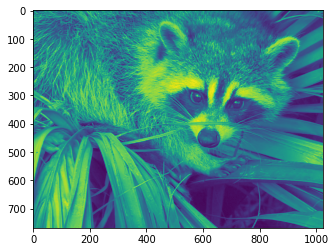

points [[0.44705882 0.50980392 0.56862745 ... 0.46666667 0.50588235 0.5372549 ]
 [0.3254902  0.40784314 0.48235294 ... 0.4627451  0.5254902  0.57254902]
 [0.26666667 0.34509804 0.42745098 ... 0.46666667 0.5254902  0.56862745]
 ...
 [0.38431373 0.40392157 0.45490196 ... 0.56470588 0.56078431 0.56078431]
 [0.36862745 0.40784314 0.47058824 ... 0.56078431 0.55686275 0.55686275]
 [0.36862745 0.41568627 0.46666667 ... 0.55686275 0.55294118 0.54901961]]
m, n 768 1024
Intial means:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Intial means Shape  (5, 1024)
After means:  [[0.47843137 0.49411765 0.         ... 0.         0.         0.        ]
 [0.47843137 0.42745098 0.         ... 0.         0.         0.        ]
 [0.3254902  0.40784314 0.         ... 0.         0.         0.        ]
 [0.30588235 0.50980392 0.         ... 0.         0.         0.        ]
 [0.39607843 0.36862745 0.         ... 0.         0.      

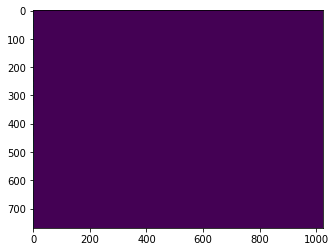

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


In [176]:
img = read_image() 
  
clusters = 5
#clusters = int(input('Enter the number of colors in the compressed image. default = 16\n')) 

points, means = initialize_means(img, clusters) 
means, index = k_means(points, means, clusters) 
compress_image(means, index, img)

In [71]:
scipy.__version__

'1.4.1'

In [132]:
points=[[1,1,1,1,1,1], [2,2,2,2,2,2], [3,3,3,3,3,3]]

In [134]:
points[1,2]

TypeError: list indices must be integers or slices, not tuple

### Compression

The original Image is :


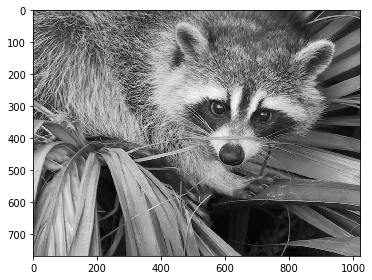

image.shape (768, 1024)
The Compressed Image is :


C:\Users\shrey\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:75: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


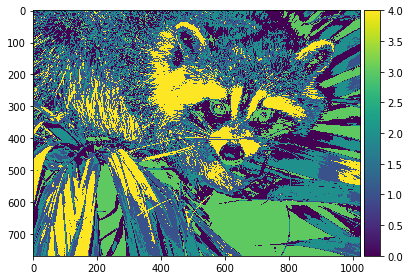

The Clusters are :
[[ 74]
 [153]
 [114]
 [ 27]
 [194]]


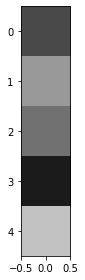

C:\Users\shrey\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\io\_io.py:141: UserWarning: compressed_tiger.png is a low contrast image
  warn('%s is a low contrast image' % fname)


In [171]:
from skimage import io
from sklearn.cluster import KMeans
import numpy as np


# Reading and Showing the Image

#image = io.imread('tiger.png')''
image = scipy.misc.face(gray=True)
io.imshow(image)
print("The original Image is :")
io.show()
 
rows = image.shape[0]
cols = image.shape[1]
 
print("image.shape",image.shape) 
#image = image.reshape(image.shape[0]*image.shape[1],3)
image = image.reshape(image.shape[0]*image.shape[1],1)
kmeans = KMeans(n_clusters = 5, n_init=10, max_iter=200)
kmeans.fit(image)
 
clusters = np.asarray(kmeans.cluster_centers_,dtype=np.uint8) 
labels = np.asarray(kmeans.labels_,dtype=np.uint8 )  
labels = labels.reshape(rows,cols); 
 
np.save('codebook_tiger.npy',clusters)

print("The Compressed Image is :")
io.imshow(labels) 
io.show() 

print("The Clusters are :")
print(clusters)
io.imshow(clusters) 
io.show() 

io.imsave('compressed_tiger.png',labels);